# Installing the required libraries

In [3]:
!pip install pandas numpy matplotlib nltk scikit-learn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/52/11/9eac327a38834f162b8250aab32a6781339c69afe7574368fffe46387edf/pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/8d/29/076999b69bd9264b8df5e56f2be18da2de6b2a2d0e10737e5307592e01de/numpy-2.2.3-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.2.3-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c7/8b/92e9da1f28310a1f6572b5c55097b0c0ceb5e27486d85fb73b54f5a9b939/matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06

# Importing the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import spacy

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /Users/sara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading the text data

In [40]:
# Load the corpus: return a list of text data and a list of filenames
def load_corpus(folder_path):
    corpus = []
    filenames = []
    for filename in os.listdir(folder_path):
        try:
            if filename.endswith(".txt"):
                with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                    corpus.append(file.read())
                    filenames.append(filename)
        except:
            print(f'Error reading file: {filename}')
    return corpus, filenames

In [41]:
folder_path = 'books'
corpus, filenames = load_corpus(folder_path)

In [42]:
print(f"Number of documents: {len(corpus)}")

Number of documents: 15


# Topic Modeling 1

## Vectorizing the text data

In [43]:
tfidf_vectorizer = TfidfVectorizer(encoding='utf-8', lowercase=True, max_df=0.95, min_df=3, max_features=2500)
corpus_vectorized = tfidf_vectorizer.fit_transform(corpus)

In [44]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [45]:
print(f"Number of features: {len(tfidf_feature_names)}")
print(f"First 10 features: {tfidf_feature_names[:10]}")
print(f"Last 10 features: {tfidf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' '_the' 'abandoned' 'above']
Last 10 features: ['yellow' 'yes' 'yesterday' 'you' 'young' 'younger' 'your' 'yours'
 'yourself' 'youth']


## Training the NMF model

In [46]:
nmf = NMF(n_components=4, random_state=1)
nmf.fit(corpus_vectorized)

NMF(n_components=4, random_state=1)

## Visualizing the topics

In [47]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

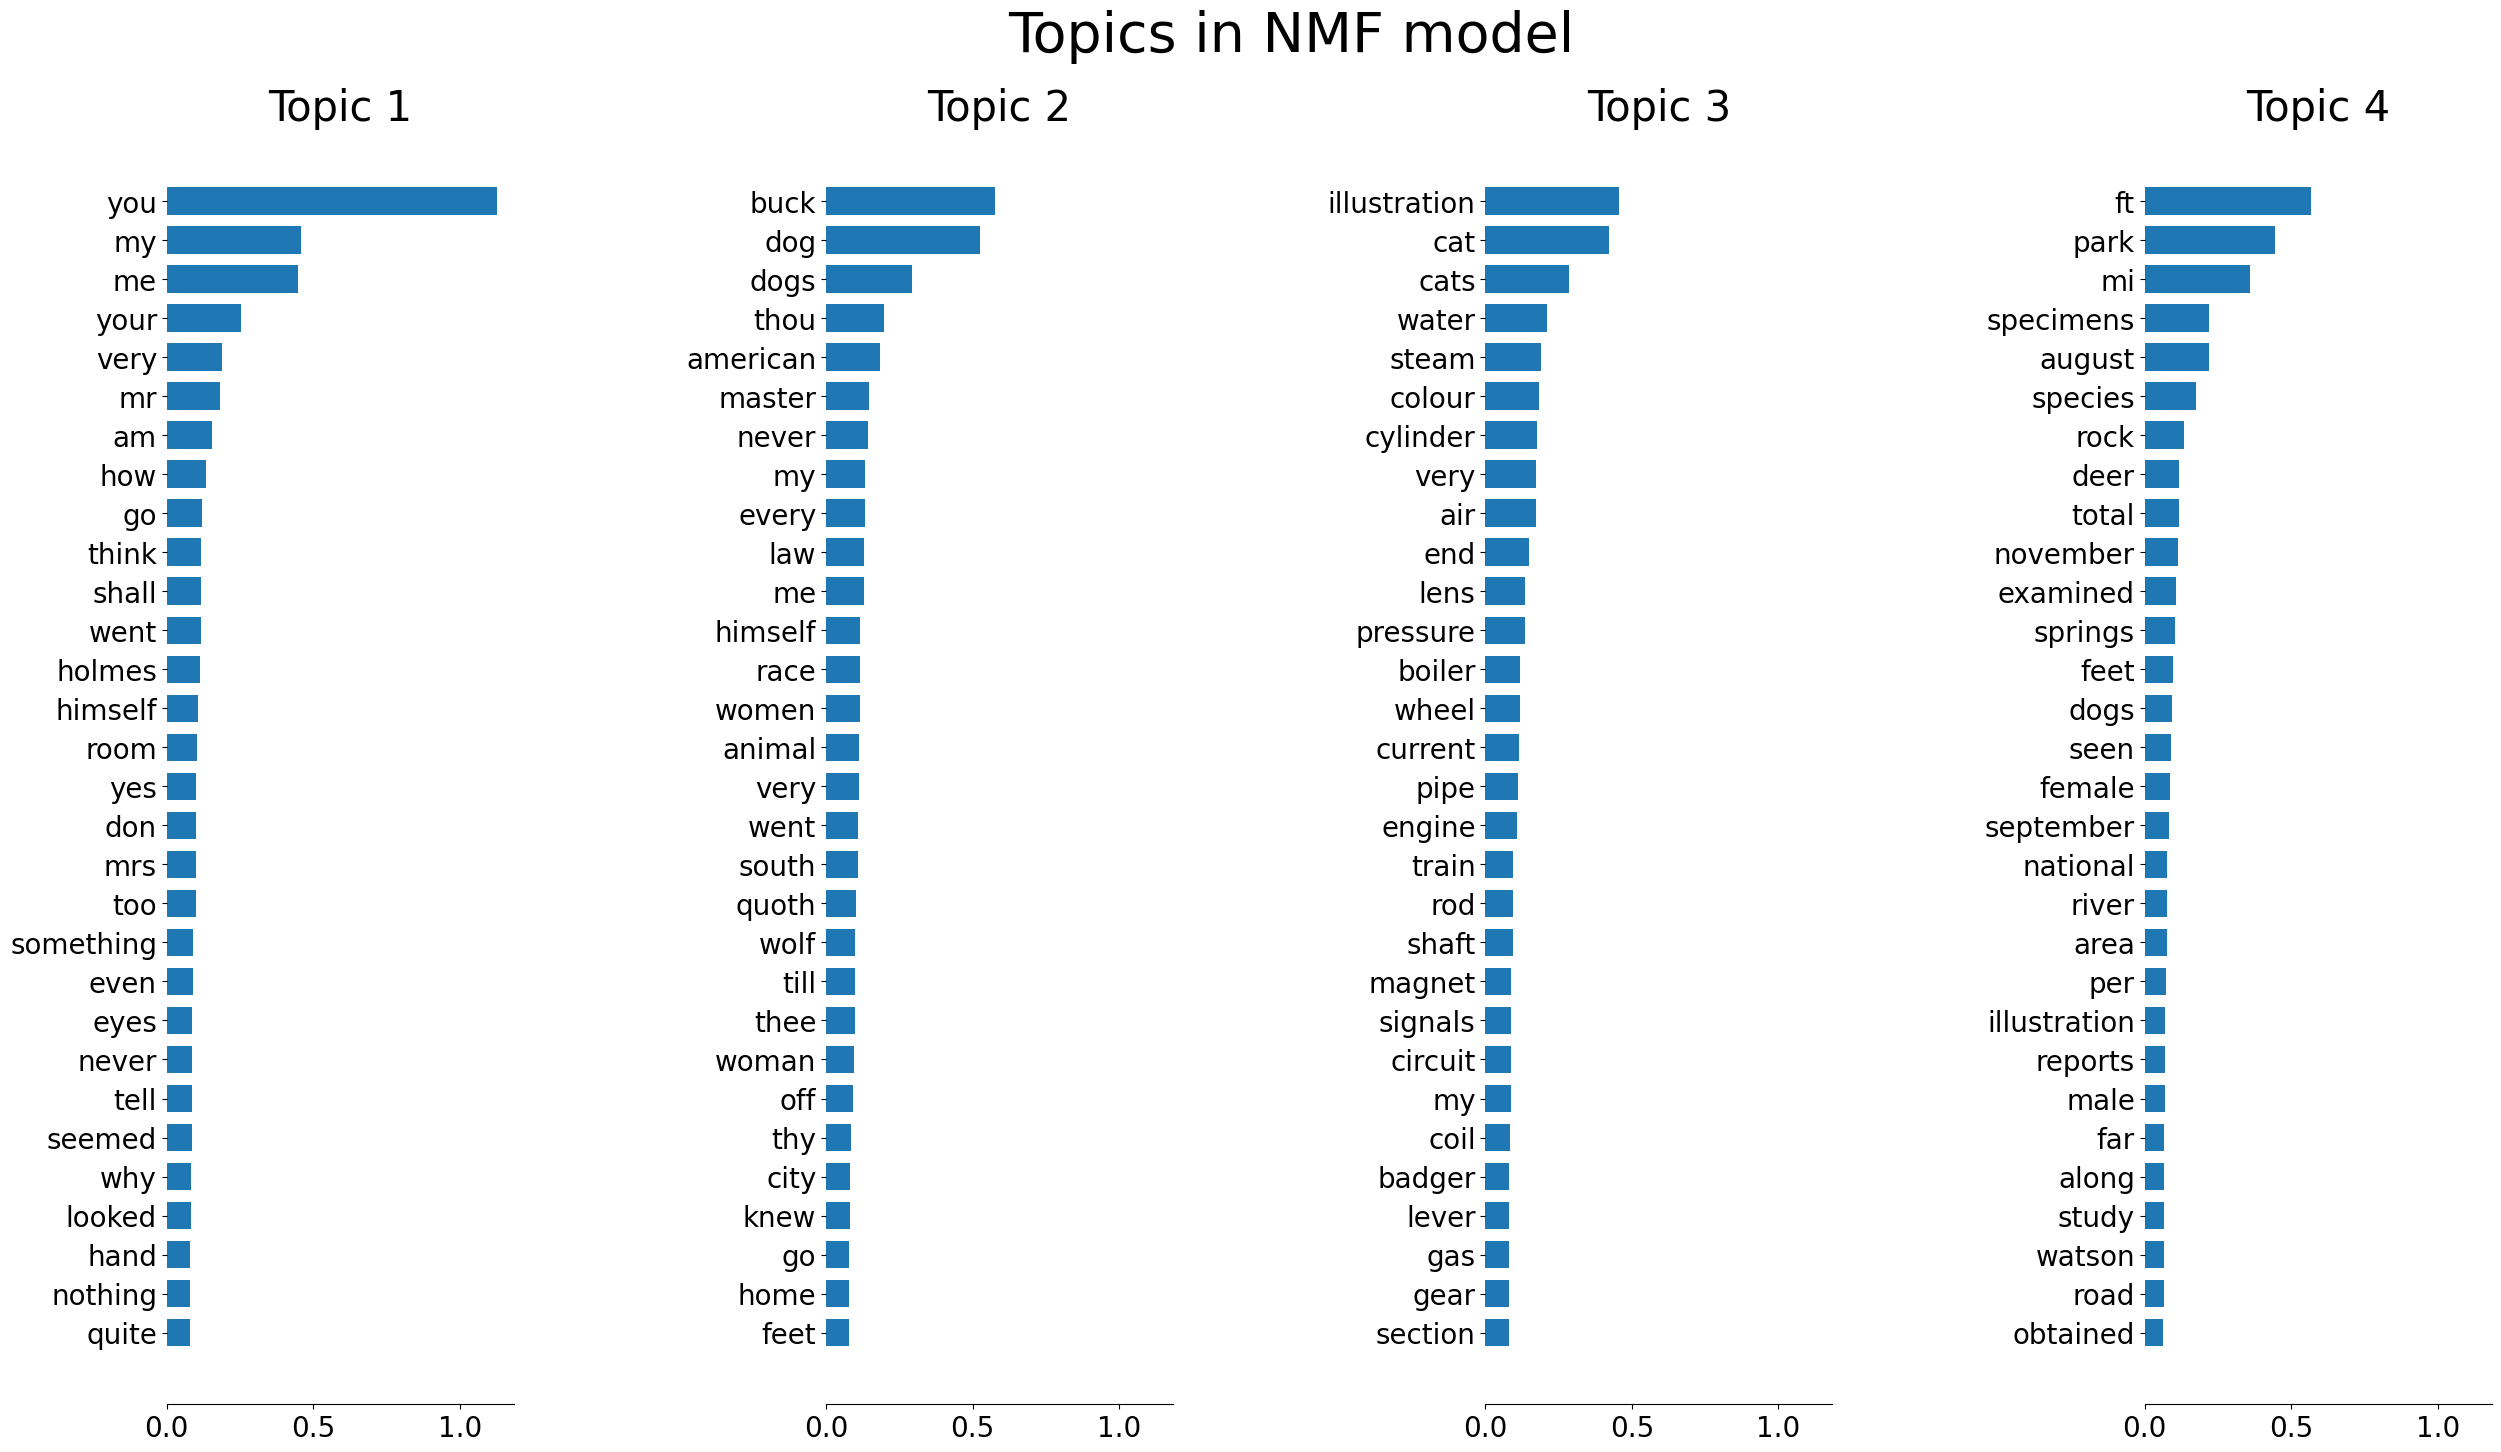

In [48]:
n_top_words = 30
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in NMF model')

In [49]:
# document topic distribution
doc_topic_dist = nmf.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.574267  0.000000  0.000000  0.000000            the_murder.txt
1   0.104806  0.275765  0.000000  0.000000            Robin hood.txt
2   0.000000  0.000000  0.695271  0.000000          how it works.txt
3   0.000000  0.000000  0.000000  0.954235               mammals.txt
4   0.439492  0.088247  0.022695  0.000000           warandpeace.txt
5   0.345588  0.000000  0.000000  0.061604      the online world.txt
6   0.554947  0.000000  0.013520  0.000000       sherlock holmes.txt
7   0.591073  0.000000  0.000000  0.000000  crime and punishment.txt
8   0.048141  0.363571  0.000000  0.000000       sothern_horrors.txt
9   0.000000  0.553194  0.000000  0.000000  the call of the wild.txt
10  0.518845  0.061133  0.021822  0.000000               dracula.txt
11  0.076507  0.000984  0.547318  0.000000              our_cats.txt
12  0.038485  0.540907  0.067770  0.039215     anecdotes of dogs.txt
13  0.279410  0.161702  0.317713  

# Topic Modeling 2: Removing stopwords

## Preprocessing the text data

In [50]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word.lower() for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [51]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [52]:
len(corpus_preprocessed[1])

403795

## Vectorizing the preprocessed text data

In [53]:
corpus_vectorized = tfidf_vectorizer.fit_transform(corpus_preprocessed)

In [54]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [55]:
print(f"Number of features: {len(tfidf_feature_names)}")
print(f"First 10 features: {tfidf_feature_names[:10]}")
print(f"Last 10 features: {tfidf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' 'abandoned' 'abroad' 'absence']
Last 10 features: ['yard' 'yards' 'ye' 'yellow' 'yes' 'yesterday' 'you' 'young' 'younger'
 'youth']


## Training the NMF model

In [56]:
nmf.fit(corpus_vectorized)

NMF(n_components=4, random_state=1)

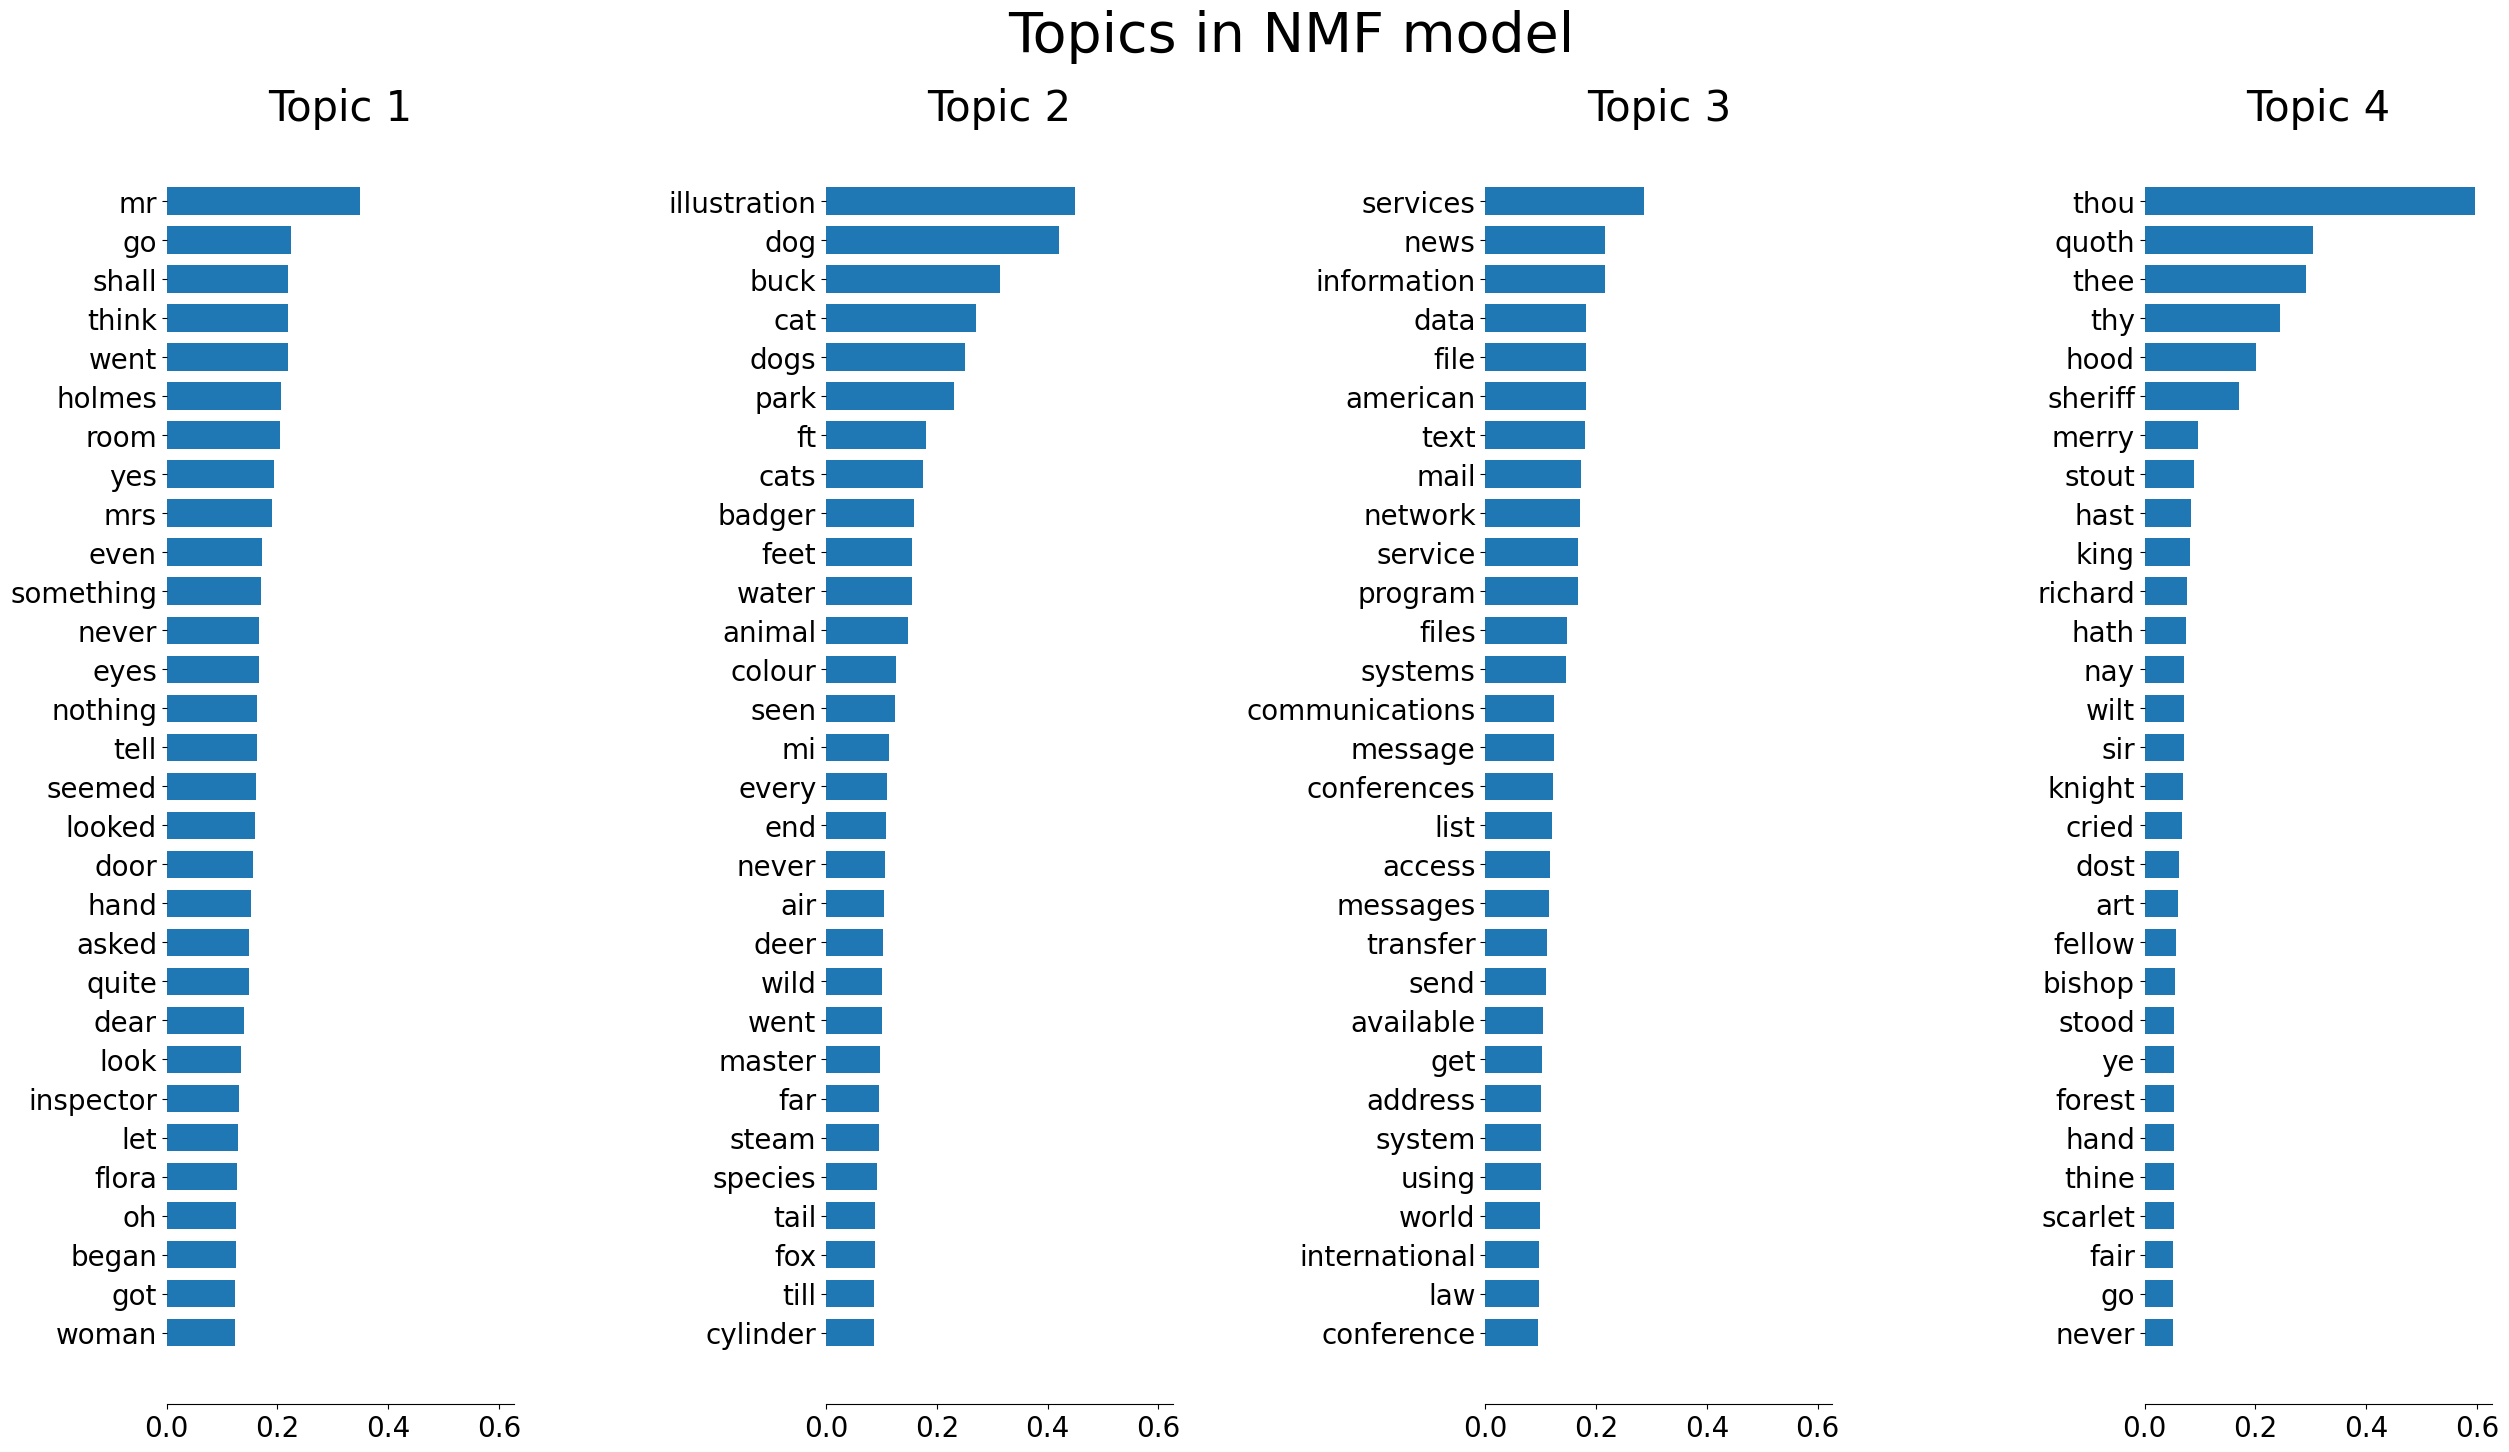

In [57]:
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in NMF model')

In [58]:
# document topic distribution
doc_topic_dist = nmf.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.506156  0.000000  0.000000  0.000000            the_murder.txt
1   0.000000  0.000000  0.000000  1.061192            Robin hood.txt
2   0.000000  0.390233  0.131138  0.000000          how it works.txt
3   0.000000  0.327866  0.018824  0.000000               mammals.txt
4   0.427046  0.017485  0.009547  0.033375           warandpeace.txt
5   0.000000  0.000000  0.936150  0.000000      the online world.txt
6   0.466504  0.006359  0.000000  0.000000       sherlock holmes.txt
7   0.562575  0.009582  0.000000  0.043789  crime and punishment.txt
8   0.195686  0.000000  0.360140  0.000000       sothern_horrors.txt
9   0.028157  0.354812  0.000000  0.069408  the call of the wild.txt
10  0.488479  0.043453  0.000000  0.038518               dracula.txt
11  0.040929  0.368581  0.000000  0.000000              our_cats.txt
12  0.096136  0.459736  0.000000  0.000000     anecdotes of dogs.txt
13  0.132141  0.533162  0.000000  

# Topic Modeling 3: + Lemmatization

## preprocessing the text data

In [59]:
def preprocess_text(text):
    word_tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize(word.lower()) for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [60]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [61]:
len(corpus_preprocessed[1])

400063

## Vectorizing the preprocessed text data

In [62]:
corpus_vectorized = tfidf_vectorizer.fit_transform(corpus_preprocessed)

In [63]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [64]:
print(f"Number of features: {len(tfidf_feature_names)}")
print(f"First 10 features: {tfidf_feature_names[:10]}")
print(f"Last 10 features: {tfidf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['000' '10' '100' '11' '12' '15' '30' '_the' 'abandoned' 'abroad']
Last 10 features: ['wrong' 'wrote' 'ye' 'yellow' 'yes' 'yesterday' 'you' 'young' 'younger'
 'youth']


## Training the NMF model

In [65]:
nmf.fit(corpus_vectorized)

NMF(n_components=4, random_state=1)

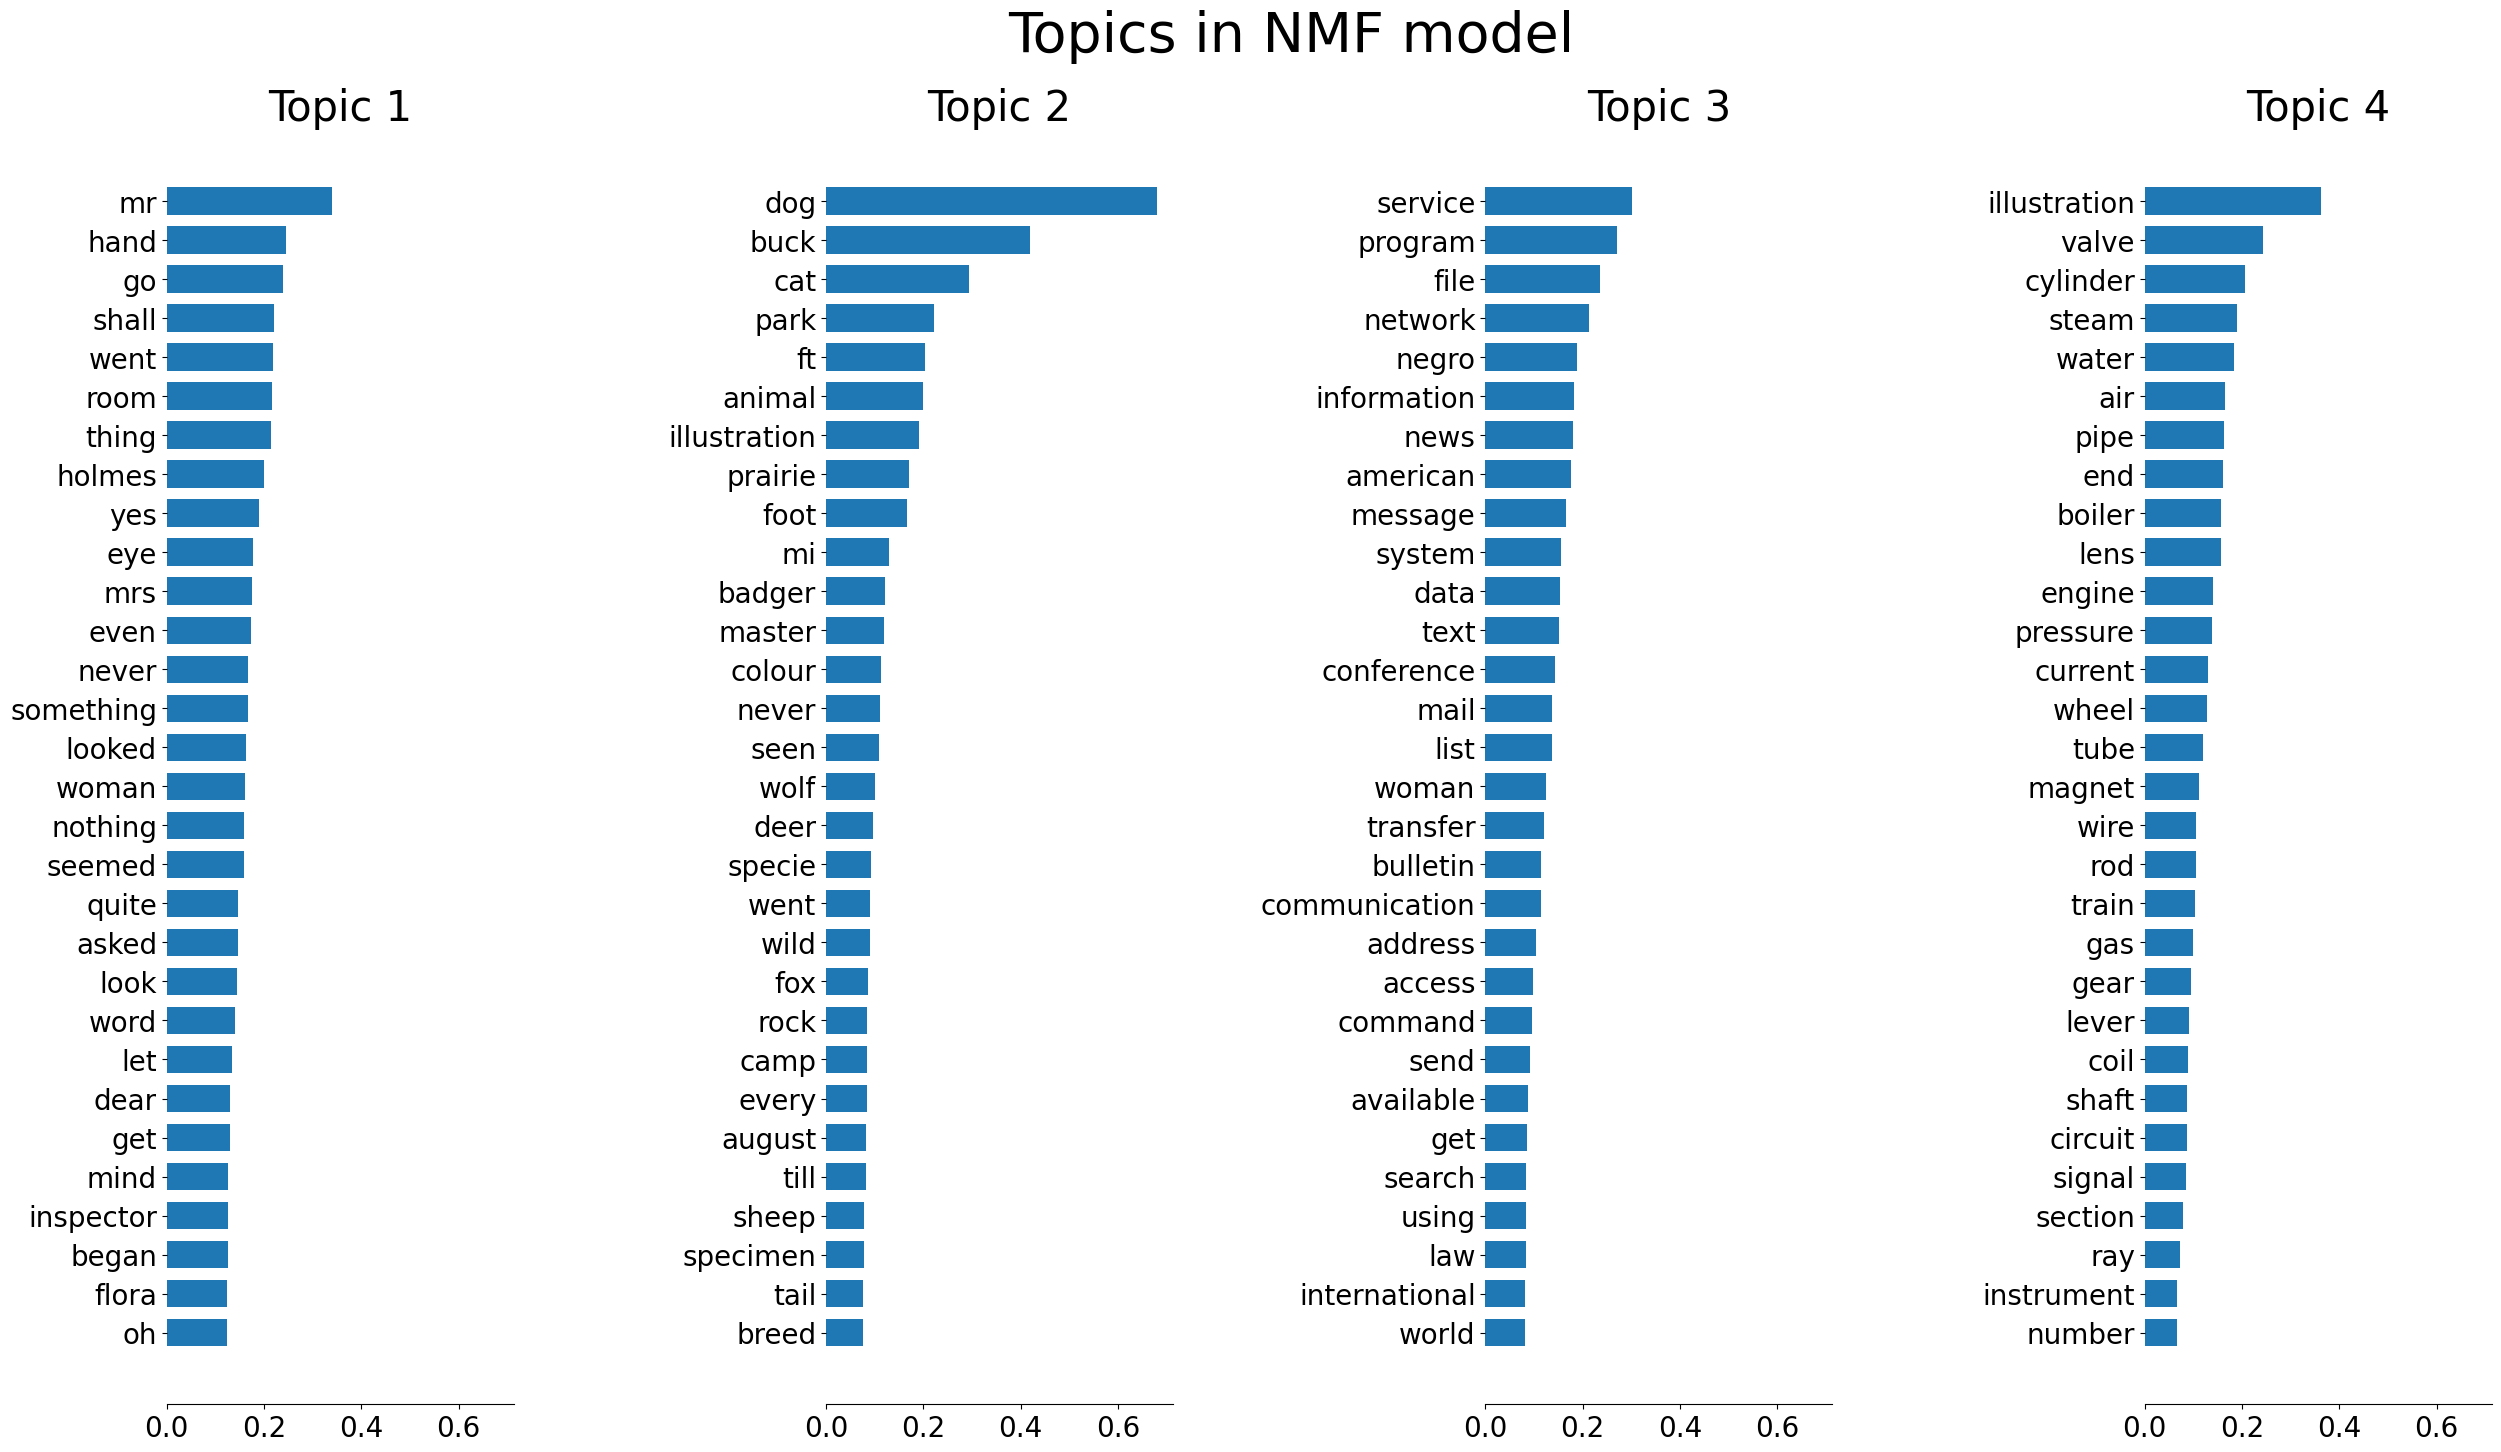

In [66]:
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in NMF model')

In [67]:
# document topic distribution
doc_topic_dist = nmf.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.496834  0.000000  0.000000  0.000000            the_murder.txt
1   0.185975  0.045735  0.000000  0.002024            Robin hood.txt
2   0.000000  0.000000  0.000000  1.033764          how it works.txt
3   0.000000  0.382367  0.119455  0.000000               mammals.txt
4   0.435481  0.012466  0.009678  0.013921           warandpeace.txt
5   0.000000  0.000000  0.948910  0.007513      the online world.txt
6   0.459900  0.000000  0.000000  0.024044       sherlock holmes.txt
7   0.569993  0.000000  0.000000  0.011494  crime and punishment.txt
8   0.159503  0.000000  0.394953  0.000000       sothern_horrors.txt
9   0.045097  0.499532  0.000000  0.000000  the call of the wild.txt
10  0.491996  0.036580  0.000000  0.044720               dracula.txt
11  0.054390  0.318609  0.001706  0.022042              our_cats.txt
12  0.062607  0.578853  0.000000  0.000000     anecdotes of dogs.txt
13  0.144655  0.405245  0.000000  

# Topic Modeling 4: + Entities Masking

## Preprocessing the text data

In [68]:
def preprocess_text(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha:
            if token.ent_type_ in ['PERSON', 'ORG', 'GPE'] or token.pos_ in ['PROPN', 'NUM', 'SYM']:
                filtered_text.append('MASKED')
            elif token.pos_ in ['DET', 'ADP', 'CCONJ', 'PRON', 'AUX', 'PART', 'PUNCT', 'INTJ']:
                continue
            else:
                filtered_text.append(token.lemma_.lower())
    return ' '.join(filtered_text)

In [69]:
nlp.max_length = 4000000

In [70]:
corpus_preprocessed = [preprocess_text(text) for text in corpus]

In [71]:
len(corpus_preprocessed[1])

292692

## Vectorizing the preprocessed text data

In [72]:
corpus_vectorized = tfidf_vectorizer.fit_transform(corpus_preprocessed)

In [73]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [74]:
print(f"Number of features: {len(tfidf_feature_names)}")
print(f"First 10 features: {tfidf_feature_names[:10]}")
print(f"Last 10 features: {tfidf_feature_names[-10:]}")

Number of features: 2500
First 10 features: ['abandon' 'abide' 'abroad' 'absence' 'absent' 'absolute' 'absolutely'
 'absorb' 'abstract' 'absurd']
Last 10 features: ['writer' 'writing' 'wrong' 'ye' 'yellow' 'yesterday' 'yield' 'yon'
 'young' 'youth']


## Training the NMF model

In [75]:
nmf.fit(corpus_vectorized)

NMF(n_components=4, random_state=1)

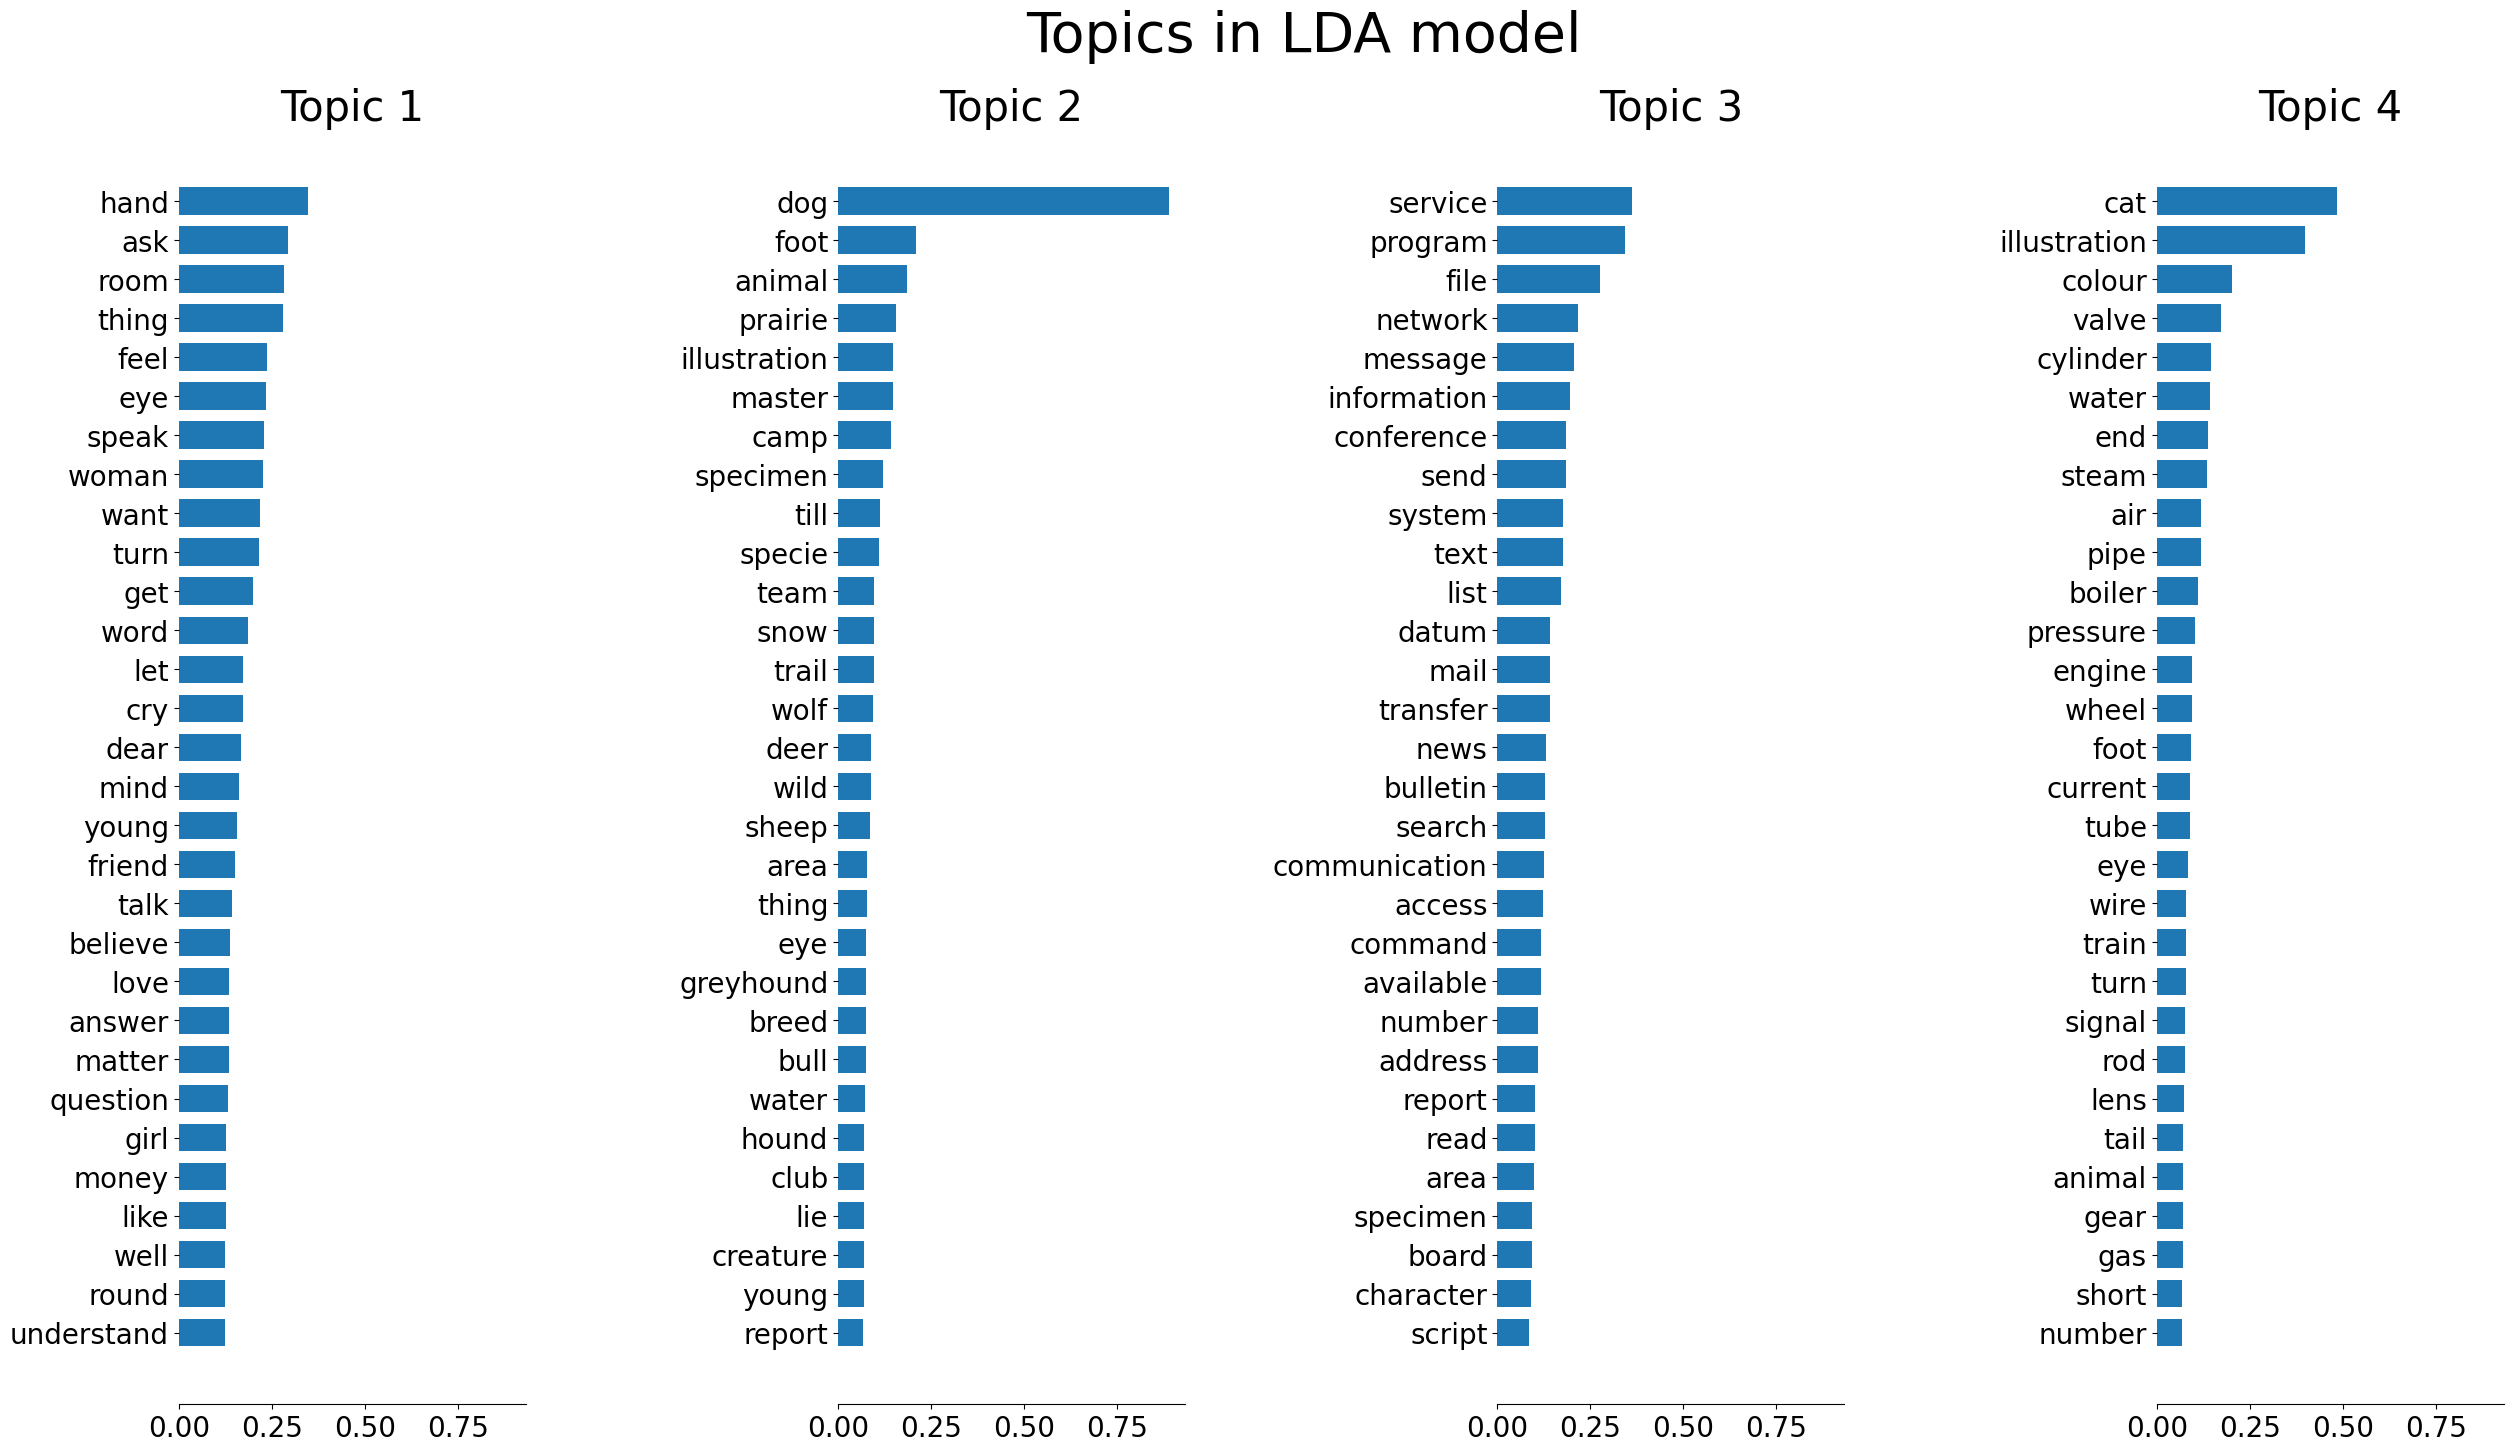

In [76]:
plot_top_words(nmf, tfidf_feature_names, n_top_words, 'Topics in LDA model')

In [77]:
# document topic distribution
doc_topic_dist = nmf.transform(corpus_vectorized)
df = pd.DataFrame(doc_topic_dist, columns=["Topic 1", "Topic 2", "Topic 3", "Topic 4"])
df['filename'] = filenames
print(df)

     Topic 1   Topic 2   Topic 3   Topic 4                  filename
0   0.514510  0.000000  0.003460  0.000000            the_murder.txt
1   0.232587  0.068077  0.000000  0.001203            Robin hood.txt
2   0.000000  0.000000  0.032184  0.759485          how it works.txt
3   0.000000  0.362838  0.247191  0.000000               mammals.txt
4   0.506611  0.021566  0.024220  0.009165           warandpeace.txt
5   0.000000  0.000000  0.902647  0.000000      the online world.txt
6   0.536459  0.020985  0.006791  0.063158       sherlock holmes.txt
7   0.566422  0.000000  0.000000  0.000000  crime and punishment.txt
8   0.274620  0.000000  0.113124  0.000000       sothern_horrors.txt
9   0.135742  0.606024  0.000000  0.000000  the call of the wild.txt
10  0.512933  0.067864  0.000000  0.041065               dracula.txt
11  0.000000  0.000000  0.000000  0.669922              our_cats.txt
12  0.005210  0.685833  0.000000  0.000000     anecdotes of dogs.txt
13  0.115867  0.333077  0.000000  